<a href="https://colab.research.google.com/github/rony23-byte/Math-Ops/blob/main/Returns_to_schooling_by_control_function_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will first of all start by importing the necessary libraries to help us explore our dataset and see how we could perform feature scaling


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
from sklearn.linear_model import LinearRegression

Let us move to reading our dataset, perform feature scaling and data manipulation


In [2]:
from scipy.io import loadmat
 
data = loadmat('/content/th2 (1) (2).mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Jan 12 14:40:11 2015', '__version__': '1.0', '__globals__': [], 'LNLOHN': array([[3.36345696],
       [2.74727082],
       [2.54374719],
       ...,
       [2.32727766],
       [2.07944155],
       [2.07944155]]), 'BILZEIT': array([[15. ],
       [10.5],
       [14.5],
       ...,
       [10.5],
       [11. ],
       [10. ]]), 'ALQ': array([[0.60000002],
       [0.60000002],
       [0.60000002],
       ...,
       [7.9000001 ],
       [7.9000001 ],
       [8.69999981]]), 'ALTER': array([[47],
       [47],
       [47],
       ...,
       [20],
       [20],
       [19]], dtype=uint8), 'ANZBR': array([[0],
       [1],
       [0],
       ...,
       [2],
       [1],
       [0]], dtype=uint8), 'KHGROSS': array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8), 'KHKLEIN': array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=uint8), 'KHMITTEL



```
# This is formatted as code
Doing conversion from .mat to .csv

In [4]:
cols=[]
for i in data:
    if '__' not in i :
       cols.append(i)
temp_df=pd.DataFrame(columns=cols)
for i in data:
    if '__' not in i :
       temp_df[i]=(data[i]).ravel()

In [5]:
temp_df.to_csv(r'/content/Data', index=False)

In [6]:
Dataa=pd.read_csv('/content/Data')
Dataa.head()

,LNLOHN,BILZEIT,ALQ,ALTER,ANZBR,KHGROSS,KHKLEIN,KHMITTEL,ANZSCH,FLAECHEGYM
0,3.363457,15.0,0.6,47,0,1,0,0,1,12.7
1,2.747271,10.5,0.6,47,1,1,0,0,0,12.7
2,2.543747,14.5,0.6,47,0,0,0,0,2,12.7
3,3.251079,18.0,0.6,47,0,1,0,0,1,12.7
4,3.526361,18.0,0.6,46,1,0,0,1,1,12.7


 Doing a selection for both the x and y variable

In [7]:
  #selecting the x and y variable   for our model
  x=Dataa[['BILZEIT','ALTER']]
  y=Dataa['LNLOHN']

Estimate the Model(1) by OLs .Report estimated parameters and ols standard errors

In [8]:
import statsmodels.api as sm
model=sm.OLS(y,x)
results=model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 LNLOHN   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          4.721e+04
Date:                Mon, 30 Jan 2023   Prob (F-statistic):                        0.00
Time:                        11:31:46   Log-Likelihood:                         -578.22
No. Observations:                1711   AIC:                                      1160.
Df Residuals:                    1709   BIC:                                      1171.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
#reporting on the estimated parameters
params=results.params
print(params)
#report on the OLS standard errors
se=results.bse
print(se)
  

BILZEIT    0.096235
ALTER      0.034939
dtype: float64
BILZEIT    0.002476
ALTER      0.000838
dtype: float64


Non parametric bootstrap with 5000 *replications*

In [10]:
from sklearn.utils import resample
model = LinearRegression()
model.fit(x,y)
# perform the bootstrap
replications = 5000
params_bs = np.zeros((replications, model.coef_.shape[0] + 1))
for i in range(replications):
    x_bs, y_bs = resample(x, y)
    model.fit(x_bs, y_bs)
    params_bs[i, :] = np.append(model.intercept_, model.coef_)

# calculate the standard errors
se = np.std(params_bs, axis=0)
print(se)

[0.05592423 0.00289411 0.00123802]


In [11]:
 
    
# Compute the standard error
se = np.std(replications, ddof=1)



/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
# Compute the 95% confidence bands
from scipy.stats import mstats
lower_bound,upper_bound=mstats.mquantiles(replications,prob=[0.025,0.975])
print("95% Confidence interval: [{}, {}]".format(lower_bound, upper_bound))
                                      

95% Confidence interval: [5000, 5000]




Using control function.
First we have to perform data manipulation to be able to achieve this.



In [13]:
Dataa=Dataa.assign(DENS=Dataa['FLAECHEGYM']*Dataa['KHGROSS'],  URG=Dataa['ALQ']*Dataa['ALTER'],SIB=Dataa['ANZBR']*Dataa['ALTER'])

In [14]:
import statsmodels.api as sm

 #prepare the data
x= Dataa[['BILZEIT','ALTER']]
y = Dataa['LNLOHN']
instruments =Dataa[['DENS','URG','SIB']]

#  Estimate the model with Two-Stage Least Squares method with all insturments
model = sm.OLS(y,x).fit()
residuals=model.resid
model=sm.OLS(x['BILZEIT'],instruments).fit()
Dataa["predicted_BILZEIT"] = model.predict(instruments)
model = sm.OLS(x["ALTER"], instruments).fit()
Dataa["predicted_ALTER"] = model.predict(instruments)

model = sm.OLS(residuals, Dataa[["predicted_BILZEIT", "predicted_ALTER"]]).fit()
params = model.params
model = sm.OLS(y, x).fit()
model.params = params

# Print summary of the linear model
print(model.summary())
 

 


                                 OLS Regression Results                                
Dep. Variable:                 LNLOHN   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          4.721e+04
Date:                Mon, 30 Jan 2023   Prob (F-statistic):                        0.00
Time:                        11:32:19   Log-Likelihood:                         -578.22
No. Observations:                1711   AIC:                                      1160.
Df Residuals:                    1709   BIC:                                      1171.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
from os import X_OK
 #Standard errors for all CF approaches using non-parametric bootstrap
 # Define the control function approaches
cf_approaches = [    {"control_vars": ["DENS"], "BILZEIT": "BILZEIT", "ALTER": "ALTER"},
    {"control_vars": ["URG"], "BILZEIT": "BILZEIT", "ALTER": "ALTER"},
    {"control_vars": ["SIB"], "BILZEIT": "BILZEIT", "ALTER": "ALTER"},
    {"control_vars": ["DENS", "URG","SIB"], "BILZEIT": " BILZEIT","ALTER": "ALTER"},
    {"control_vars": [], "BILZEIT": "BILZEIT", "ALTER": "ALTER"}
]

# Estimate standard errors for each CF approach using a nonparametric bootstrap
n_bootstraps = 5000
params = []
se = []
for approach in cf_approaches:
    p = []
    s = []
    for i in range(n_bootstraps):
        sample = Dataa.sample(Dataa.shape[0], replace=True)
        x = sample[['BILZEIT','ALTER'] + approach["control_vars"]]
        y =sample['LNLOHN']
        model = sm.OLS(y,x).fit()
        p.append(model.params)
        s.append(model.bse)
    params.append(np.array(p))
    se.append(np.array(s))

# Print the average and standard deviation of the parameter estimates and standard errors
for i, approach in enumerate(cf_approaches):
    print("Control Function Approach:", approach)
    avg_params = np.mean(params[i], axis=0)
    avg_se = np.mean(se[i], axis=0)
    std_params = np.std(params[i], axis=0)
    std_se = np.std(se[i], axis=0)
    
    print("Average Parameters:", avg_params)
    print("Standard Deviation of Parameters:", std_params)
    print("Average Standard Errors:", avg_se)
    print("Standard Deviation of Standard Errors:", std_se)
    print()
 







Control Function Approach: {'control_vars': ['DENS'], 'BILZEIT': 'BILZEIT', 'ALTER': 'ALTER'}
Average Parameters: [0.09607668 0.0349164  0.00013839]
Standard Deviation of Parameters: [0.0025754  0.00083912 0.0001779 ]
Average Standard Errors: [0.00248603 0.00083821 0.00015916]
Standard Deviation of Standard Errors: [7.39865305e-05 2.44437656e-05 6.73028615e-06]

Control Function Approach: {'control_vars': ['URG'], 'BILZEIT': 'BILZEIT', 'ALTER': 'ALTER'}
Average Parameters: [0.07661136 0.03669328 0.00119705]
Standard Deviation of Parameters: [2.79470547e-03 8.34174521e-04 7.93412144e-05]
Average Standard Errors: [2.67078010e-03 7.96456741e-04 7.98795206e-05]
Standard Deviation of Standard Errors: [8.19035930e-05 2.36302732e-05 2.55482774e-06]

Control Function Approach: {'control_vars': ['SIB'], 'BILZEIT': 'BILZEIT', 'ALTER': 'ALTER'}
Average Parameters: [ 0.09600616  0.03513079 -0.00011857]
Standard Deviation of Parameters: [0.00264534 0.00092967 0.00019692]
Average Standard Errors: [0

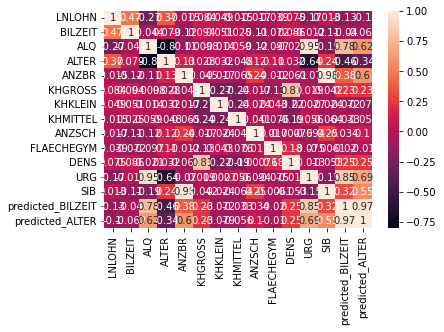

In [16]:
 import seaborn as sns
 import matplotlib.pyplot as plt
 corr=Dataa.corr()
 #create the heatmap
 sns.heatmap(corr,annot=True)
 #Show the PLOT
 plt.show()
